# Time Series Analysis and Forecasting

In [2]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [3]:
#load the train dataset
df = pd.read_csv('sales_data.csv', engine = 'python')

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df.info() #show the data info (type of data in every columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null object
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-null obje

In [6]:
#understanding the distribution of the concerned data. Will display only numerics columns
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [7]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE']) #converting the data type of ORDERDATE column to date time format
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
ORDERNUMBER         2823 non-null int64
QUANTITYORDERED     2823 non-null int64
PRICEEACH           2823 non-null float64
ORDERLINENUMBER     2823 non-null int64
SALES               2823 non-null float64
ORDERDATE           2823 non-null datetime64[ns]
STATUS              2823 non-null object
QTR_ID              2823 non-null int64
MONTH_ID            2823 non-null int64
YEAR_ID             2823 non-null int64
PRODUCTLINE         2823 non-null object
MSRP                2823 non-null int64
PRODUCTCODE         2823 non-null object
CUSTOMERNAME        2823 non-null object
PHONE               2823 non-null object
ADDRESSLINE1        2823 non-null object
ADDRESSLINE2        302 non-null object
CITY                2823 non-null object
STATE               1337 non-null object
POSTALCODE          2747 non-null object
COUNTRY             2823 non-null object
TERRITORY           1749 non-n

In [8]:
#show the distribution of dates in ORDERDATA column
print('Order Date Description\n')
print(df['ORDERDATE'].describe())

Order Date Description

count                    2823
unique                    252
top       2003-11-14 00:00:00
freq                       38
first     2003-01-06 00:00:00
last      2005-05-31 00:00:00
Name: ORDERDATE, dtype: object


In [9]:
df.sort_values(by = ['ORDERDATE'], inplace = True, ascending = True) #sorting data by ascending of the column values ORDERDATE
df.set_index('ORDERDATE', inplace = True) #setting ORDERDATE as index of the dataframe 'df' for ease of Time Series Data Analysis

In [10]:
new_data = pd.DataFrame(df['SALES']) #create new dataframe with only target column. #the SALES column as a target and ORDERDATE as the index
new_data.head()

,SALES
ORDERDATE,
2003-01-06,5151.00
2003-01-06,3390.00
2003-01-06,1903.22
2003-01-06,1689.03
2003-01-09,1404.00


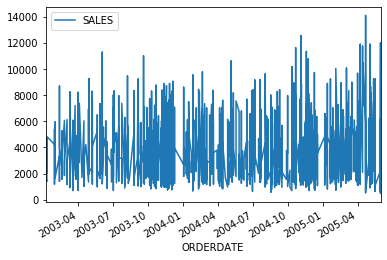

In [11]:
#plotting the data to understand the sales distribution from the yaer 2005 - 2018
new_data.plot()

<br><br>
A series is said to be stationary when its mean and variance do not change over time. From the above distribution of the sales it is not clear whether the sales distribution is stationary or not. Let us perform some stationarity tests to check whether the time series is stationary or not.
<br><br>

<br><br>
**Checking for Stationary**
<br><br>

In [12]:
new_data = pd.DataFrame(new_data['SALES'].resample('D').mean())
new_data = new_data.interpolate(method = 'linear') #interpolate() function is used to interpolate valies according to different methods. It ignore the index and treats the values as equally spaced

<br><br>
**Method 1**<br>
To check for stationarity by comparing the change in mean and variance over time, let us split teh data into train, test, and validation
<br><br>

In [13]:
train, test, validation = np.split(new_data['SALES'].sample(frac = 1), [int(.6*len(new_data['SALES'])), int(.8*len(new_data['SALES']))])

In [14]:
print('Train Dataset')
print(train)
print('Test Dataset')
print(test)
print('Validation Dataset')
print(validation)

Train Dataset
ORDERDATE
2003-11-05    2933.600000
2005-02-21    3376.963448
2003-02-06    3700.976028
2003-03-29    3460.690500
2005-02-18    3988.683021
2004-10-30    3074.360147
2003-03-16    3533.082500
2003-12-25    3751.585472
2003-05-10    3262.651716
2003-07-15    3589.144583
2005-04-05    4282.758333
2004-09-18    2700.045455
2005-02-19    3784.776497
2003-10-20    4214.125000
2003-04-19    3986.769000
2004-10-09    2729.172471
2004-12-22    2885.111184
2005-05-26    3623.714357
2003-01-30    3425.666731
2004-07-03    5565.918333
2003-07-07    4768.470000
2003-01-27    3420.259211
2005-05-05    5274.745000
2005-01-12    3405.643077
2004-01-31    4772.214000
2003-04-13    2482.005000
2004-12-03    2807.603333
2004-10-27    3178.569388
2005-03-20    4552.365625
2004-02-29    3350.503371
                 ...     
2004-06-27    3790.315497
2004-11-07    3803.673800
2004-04-08    3626.155694
2004-07-28    3430.827540
2005-05-06    3451.206429
2004-06-08    2374.725000
2004-02-19    

In [15]:
mean1, mean2, mean3 = train.mean(), test.mean(), validation.mean() #taking mean of train, test, and validation data
var1, var2, var3 = train.var(), test.var(), validation.var() #taking variance of train, test, and validation data

print('Mean:')
print(mean1, mean2, mean3)
print('Variance:')
print(var1, var2, var3)

Mean:
3548.7257867310223 3480.0871592941794 3606.5688360029194
Variance:
532489.8707128055 495272.66832761245 575371.1256593633


<br><br>
From the above values of mean and variance, it can be inferred that their is not much difference in the three values of mean and variance, indicating that the series is stationary. However, to verify our observations, let us perform a standard stationarity test, called Augmented Dicky Fuller test.
<br><br>

<br><br>
**Augmented Dicky Fuller Test**
* The Augmented Dickey-Fuller test is a type of statistical test alsocalled a unit root test.The base of unit root test is that it helps in determining how strongly a time series is defined by a trend.
* The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary. The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.
    1. Null Hypothesis(H0): Time series is not stationary
    2. Alternate Hypothesis (H1): Time series is stationary
* This result is interpreted using the p-value from the test.
    1. p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
    2. p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.


<br><br>
**Method 2 - Augmented Dicky Fuller Test**
<br><br>

In [16]:
from statsmodels.tsa.stattools import adfuller #import adfuller tool from statsmodels
#statsmodel provied addfuller() funcyion to implement stationarity test of a time series
data1 = new_data.iloc[:,0].values #exclude the other data (only one data as target)
adf = adfuller(data1) 

print(adf)
print('\nADF = ', str(adf[0])) #more towards negative value the better
print('\np-value = ', str(adf[1]))
print('\nCritical Values: ')

for key, val in adf[4].items():
    print(key,':',val)
    

    if adf[0] < val:
        print('Null Hypothesis Rejected. Time Series is Stationary')
    else:
        print('Null Hypothesis Accepted. Time Series is not Stationary')

(-9.903887304631137, 3.302498206951594e-17, 2, 874, {'1%': -3.437854130362047, '5%': -2.8648525821630173, '10%': -2.5685338603647714}, 12630.895135819677)

ADF =  -9.903887304631137

p-value =  3.302498206951594e-17

Critical Values: 
1% : -3.437854130362047
Null Hypothesis Rejected. Time Series is Stationary
5% : -2.8648525821630173
Null Hypothesis Rejected. Time Series is Stationary
10% : -2.5685338603647714
Null Hypothesis Rejected. Time Series is Stationary


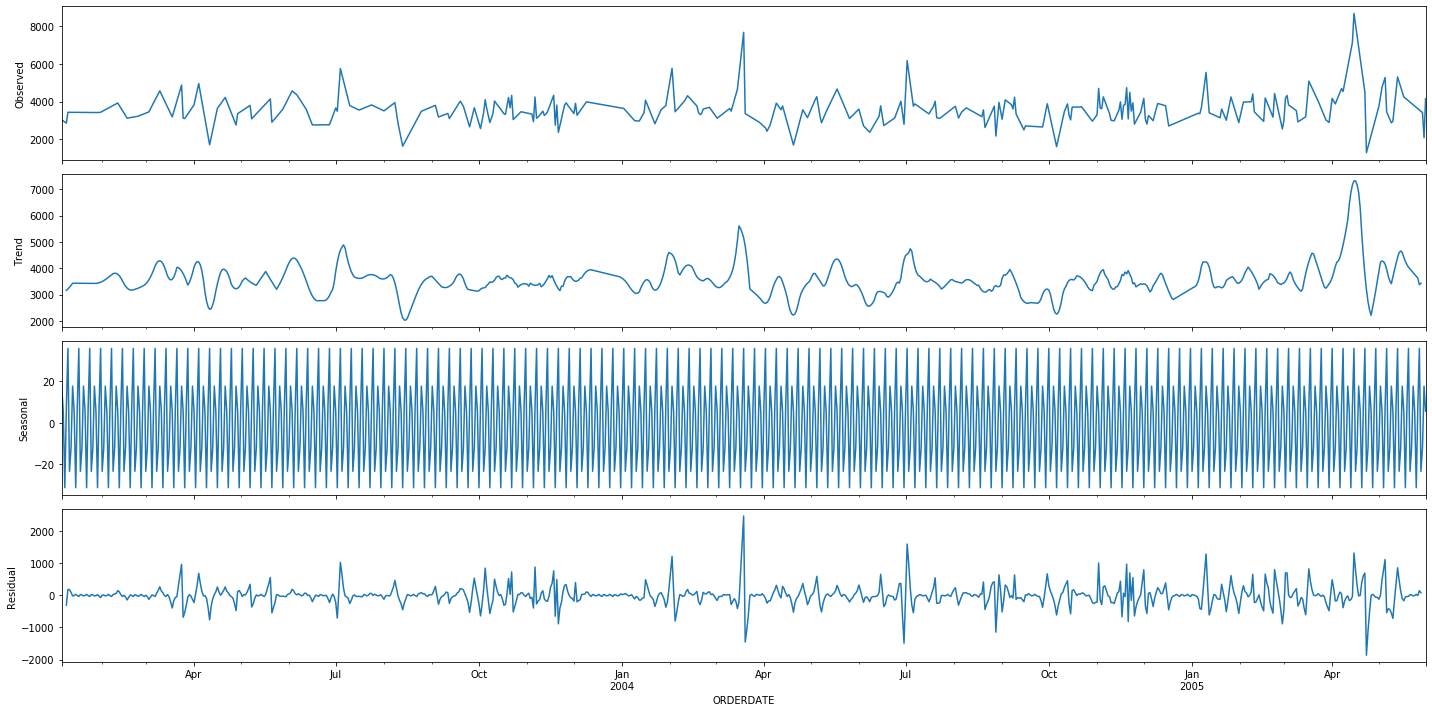

In [17]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(new_data, model = 'additive') #function used to decompose Time Series Data into Trend and Seasonality

fig = decomposition.plot()
plt.show()

<br><br>
Now that we know our time series is data is stationary. Let us begin with model training for forecasting the sales. We have chosen SARIMA model to forecast the sales.

Seasonal Autoregressive Integrated Moving Average, SARIMA or Seasonal ARIMA, is an extension of ARIMA that supports univariate time series data with a seasonal component.

SARIMA requires selecting hyperparameters for both the trend and seasonal elements of the series.
* Trend Elements There are three trend elements that require configuration.
p: Trend autoregression order. d: Trend difference order. q: Trend moving average order.
* Seasonal Elements There are four seasonal elements:
P: Seasonal autoregressive order. D: Seasonal difference order. Q: Seasonal moving average order. m: The number of time steps for a single seasonal period.

The notation for a SARIMA model is specified as: SARIMA(p,d,q)(P,D,Q)m
<br><br>

In [18]:
import itertools
p = d = q = range(0, 2) 
pdq = list(itertools.product(p, d, q))
seasonal_pdq_comb = [(i[0], i[1], i[2], 12) for i in list(itertools.product(p, d, q))] #for loop for creating combinations of seasonal parameters of SARIMA
print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[1]))
print('SARIMA: {} x {}'.format(pdq[1], seasonal_pdq_comb[2]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[3]))
print('SARIMA: {} x {}'.format(pdq[2], seasonal_pdq_comb[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMA: (0, 0, 1) x (0, 0, 1, 12)
SARIMA: (0, 0, 1) x (0, 1, 0, 12)
SARIMA: (0, 1, 0) x (0, 1, 1, 12)
SARIMA: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
for parameters in pdq: #for loop for determining the best combination of seasonal parameters for SARIMA
    for seasonal_param in seasonal_pdq_comb:
        try:
            mod = sm.tsa.statespace.SARIMAX(new_data,
                                            order=parameters,
                                            seasonal_param_order=seasonal_param,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False) #determines the AIC value of the model**
            results = mod.fit()
            print('SARIMA{}x{}12 - AIC:{}'.format(parameters, seasonal_param, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:16845.08198439904
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:16204.635766743742
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:16204.635766743742
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:12996.296216193296
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1

In [20]:
mod = sm.tsa.statespace.SARIMAX(new_data,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False) #model defintion
results = mod.fit() #model fitting
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8428      0.011     74.619      0.000       0.821       0.865
ma.L1         -1.0056      0.006   -170.626      0.000      -1.017      -0.994
ar.S.L12      -0.0505      0.040     -1.254      0.210      -0.129       0.028
ma.S.L12      -1.0287      0.021    -48.351      0.000      -1.070      -0.987
sigma2      1.475e+05   6430.036     22.941      0.000    1.35e+05     1.6e+05


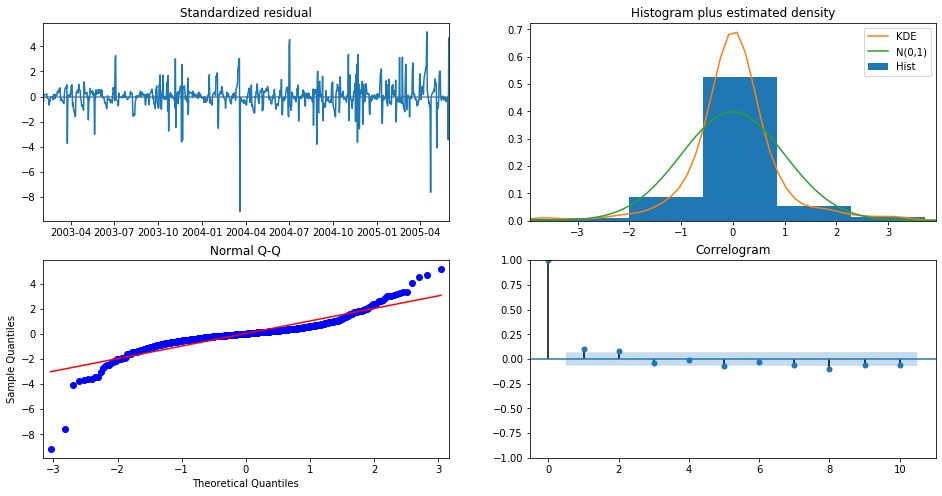

In [21]:
results.plot_diagnostics(figsize=(16, 8)) #Produces a plot grid of: 1. Standardized residuals over time 
# 2. Histogram plus estimated density of standardized residulas and along with a Normal(0,1) density plotted for reference.
# 3. Normal Q-Q plot, with Normal reference line and, 4. Correlogram.
plt.show()

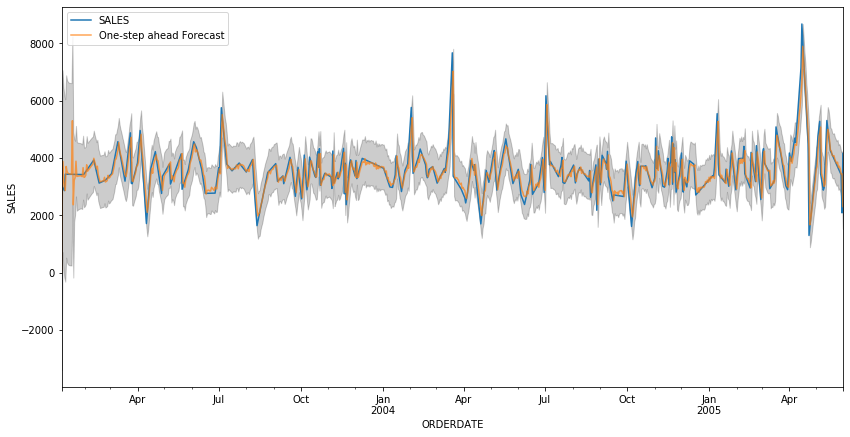

In [22]:
pred = results.get_prediction(start=pd.to_datetime('2003-01-06'), dynamic=False) # variable to display plot for predicted values
pred_val = pred.conf_int()
ax = new_data['2002':].plot(label='observed') # displays plot for original values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7)) # displays plot for predicted values
ax.fill_between(pred_val.index,
                pred_val.iloc[:, 0],
                pred_val.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('ORDERDATE')
ax.set_ylabel('SALES')
plt.legend()
plt.show()

In [23]:
y_forecasted = pred.predicted_mean
y_truth = new_data['SALES']

from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y_forecasted, y_truth)
rmse = sqrt(mse)
print('The Mean Squared Error of the forecasts is {}'.format(round(rmse, 2))) # displays the root mean squared error of the forecast with rounding it up to 2 decimals

The Mean Squared Error of the forecasts is 416.65


<br><br>
Out of sample forecast:

To forecast sales values after some time period of the given data. In our case, we have to forecast sales with time period of 7 days.
<br><br>

In [24]:
forecast = results.forecast(steps=7) # making a forecast of 7 days later of the last date in the 'Order Date' column
print(forecast.astype('float')) #displays the sales forecast as type integer

2005-06-01    4082.974060
2005-06-02    4099.433772
2005-06-03    4051.959403
2005-06-04    4037.950989
2005-06-05    4015.867385
2005-06-06    4110.573081
2005-06-07    4018.779529
Freq: D, dtype: float64


In [25]:
forecast = forecast.astype('int') #saving the sales values as type integer
forecast_df = forecast.to_frame() # forecast is in Series form, converting it to DataFrame
forecast_df.reset_index(level=0, inplace=True) # converting the index to column
forecast_df.columns = ['Prediction Date', 'Predicted Sales'] # giving appropriate names to the output columns
prediction = pd.DataFrame(forecast_df).to_csv('prediction.csv',index=False) # saving the output as a csv file with name 'prediction.csv'